![](https://drive.google.com/uc?export=view&id=1-5X9OUkA-C2Ih1gOS9Jd7GmkTWUEpDg1)

Asignatura: Introducción a Data Science

Profesor: Juan Bekios Calfa

---



# Laboratorio 03: Teoría de grafos

En los cursos de ciencias básicas de computación se estudia con frecuencia el problema del vendedor viajero (problema del vendedor ambulante, problema del agente viajero o problema del viajante (**TSP ** por sus siglas en inglés (*Travelling Salesman Problem*))) y se definen como: dada una lista de ciudades y las distancias entre cada par de ellas, ¿cuál es la ruta más corta posible que visita cada ciudad exactamente una vez y al finalizar regresa a la ciudad origen? Este es un problema NP-Hard dentro en la optimización combinatoria, muy importante en investigación operativa y en ciencias de la computación. [wikipedia](https://es.wikipedia.org/wiki/Problema_del_viajante)

También, existe otro tipo de problemas interesantes y similares al del vendedor viajero. Uno de ellos, es el que implementaremos en este laboratorio, denominado problema del cartero chino (PCC). El problema consiste en **encontrar el camino más corto o circuito cerrado**, que **visite cada arista de un grafo (conectado) no direccionado**, o sea, que pase al menos una vez por cada arista del grafo, volviendo al punto (o nodo) de partida. Cuando el grafo posee un circuito euleriano (un paseo cerrado que alcance toda arista solamente una vez), ese circuito es una solución óptima. [wikipedia](https://es.wikipedia.org/wiki/Problema_del_cartero_chino)

**Problema**:

El parque Sleeping Giant State, ubicado en  New Haven, Connecticut, Estados Unidos. Es un parque de compuesto de un sin número de senderos que permiten a los turistas caminar por ellos. Como el parque tiene una extensión de terreno muy grande, mucha gente decide recorrer todos los senderos en un solo día. 

![](https://www.wnpr.org/sites/wnpr/files/styles/x_large/public/201906/sleeping__3_of_5_.jpg)

Como el calcular la ruta adecuada no es fácil recurriremos al material visto en clases para poder encontrar la ruta óptima que nos permita recorrer todos los senderos en un mínimo de tiempo.

Para poder resolver este problema contamos con un plano que indica cada una de esas rutas.

![](https://giantstout.files.wordpress.com/2010/10/sg-trail-map.jpg?w=640&h=460)

El problema está basado en [link](https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial).

## Librerías que se utilzarán en el laboratorio




In [ ]:
import networkx as nx # Librería para grafos
import pandas as pd # Librería para manejar datos (dataframe)
import matplotlib.pyplot as plt # Librería para gráficos

## 1. Carga de datos

Para resolver este problema cargaremos un archivo que contiene una lista de con los arcos del grafo y cada fila contiene los siguientes campos:

*   **node1** y **node2**: Nombre de los nodos conectados.
*   **trail**: Atributo que indica un atributo del arco. (Por ejemplo, rs=cuadro rojo)
*   **distance**: Atributo del arco que indica la longitud del sendero en millas.
*   **color**: Color utilizado para indicar el sendero trazado.
*   **estimate**: Distancia del arco estimada a partir de la observación de los senderos del mapa (1=SI, 0=N=), ya que algunas distancias no se proporcionan. Esto es solo de referencia y no será utilizado para el análisis.





In [65]:
# Grab edge list data hosted on Gist
lista_arcos = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')

lista_arcos.head(10)

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0
5,o_rs,y_rs,rs,0.12,red,0
6,y_rs,rs_end_south,rs,0.39,red,0
7,rc_end_north,v_rc,rc,0.70,red,0
8,v_rc,b_rc,rc,0.04,red,0
9,b_rc,g_rc,rc,0.15,red,0


### Lista de nodos

Las listas de nodos suelen ser opcionales en `networkx`, y otras bibliotecas de gráficos, cuando se proporcionan listas de arcos ya vienen los nombres por lo que no es necesario identificarlos. Sin embargo, en este caso, hay algunos atributos de nodo que nos gustaría añadir: Coordenadas X, Y de los nodos (intersecciones de senderos) para que pueda trazar su gráfica con el mismo diseño que el mapa de senderos.

*    id: nombre del nodo correspondiente al nodo1 y al nodo2 en la lista de bordes.
*    X: posición horizontal/coordenada del nodo correspondiente al topleft.
*    Y: posición/coordinación vertical del nodo relativo al topleft.

In [37]:
# Archivo de la lista de nodos
lista_nodos = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')

lista_nodos.head(10)

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771
5,b_gy2,2000,983
6,b_o,2039,1012
7,b_rc,1311,979
8,b_rd,268,1744
9,b_rd_dupe,268,1744


## 2. Creando el grafo

Usaremos la lista de arcos (aristas) y la lista de nodos para crear el grafo utilizando las librerías de `networkx`.

In [ ]:
# Crear un grafo limpio

g = nx.Graph()

Construimos el grafo ingresando cada uno de sus arcos y sus correspondientes atributos al grafo `g`.

In [34]:
# Agregar aristas y atributos a las aristas (arcos)

for _, fila_arco in lista_arcos.iterrows():
  #print(index, fila_arco)
  g.add_edge(fila_arco[0], fila_arco[1], attr_dict=fila_arco[2:].to_dict())

Para ilustrar los valores devueltos revisamos la última fila examinada en el ciclo `for`.

In [33]:
# Ejemplo de lista de arcos
print(fila_arco[0]) # nodo 1
print(fila_arco[1]) # nodo 2
print(fila_arco[2:].to_dict()) # atributos asociados al arco

o_gy2
y_gy2
{'trail': 'gy2', 'distance': 0.12, 'color': 'yellowgreen', 'estimate': 0}


De la misma forma que se agregaron atributos a los arcos del grafo. Agregaremos los atributos a cada nodo.

In [42]:
# Agregar atributos a los nodos
for _, fila_nodo in lista_nodos.iterrows():
  #print(fila_nodo['id'], fila_nodo[1:].to_dict())
  g.nodes[fila_nodo['id']].update(fila_nodo[1:].to_dict())

Si anallizamos la última fila de la lista de nodos podemos ver:

In [43]:
# Ejemplo de lista de nodos
print(fila_nodo)

id    y_rt
X      977
Y     1666
Name: 76, dtype: object


## 3. Explorando el grafo creado

El grafo creado almacena la información de cada arco en una tupla de tres elementos. Dos son string y el tercero es un diccionario.

In [44]:
# Visualizar el grafo
g.edges.data()

EdgeDataView([('rs_end_north', 'v_rs', {'attr_dict': {'trail': 'rs', 'distance': 0.3, 'color': 'red', 'estimate': 0}}), ('v_rs', 'b_rs', {'attr_dict': {'trail': 'rs', 'distance': 0.21, 'color': 'red', 'estimate': 0}}), ('v_rs', 'v_bv', {'attr_dict': {'trail': 'v', 'distance': 0.52, 'color': 'violet', 'estimate': 0}}), ('v_rs', 'v_end_east', {'attr_dict': {'trail': 'v', 'distance': 0.54, 'color': 'violet', 'estimate': 0}}), ('b_rs', 'g_rs', {'attr_dict': {'trail': 'rs', 'distance': 0.11, 'color': 'red', 'estimate': 0}}), ('b_rs', 'b_bv', {'attr_dict': {'trail': 'b', 'distance': 0.43, 'color': 'blue', 'estimate': 0}}), ('b_rs', 'b_g', {'attr_dict': {'trail': 'b', 'distance': 0.07, 'color': 'blue', 'estimate': 0}}), ('g_rs', 'w_rs', {'attr_dict': {'trail': 'rs', 'distance': 0.18, 'color': 'red', 'estimate': 0}}), ('g_rs', 'g_rc', {'attr_dict': {'trail': 'g', 'distance': 0.45, 'color': 'green', 'estimate': 0}}), ('g_rs', 'b_g', {'attr_dict': {'trail': 'g', 'distance': 0.05, 'color': 'green

### Imprimir los primeros cinco arcos

In [45]:
# Visualizar los primeros cinco arcos del grafo
list(g.edges(data=True))[:5]

[('rs_end_north',
  'v_rs',
  {'attr_dict': {'color': 'red',
    'distance': 0.3,
    'estimate': 0,
    'trail': 'rs'}}),
 ('v_rs',
  'b_rs',
  {'attr_dict': {'color': 'red',
    'distance': 0.21,
    'estimate': 0,
    'trail': 'rs'}}),
 ('v_rs',
  'v_bv',
  {'attr_dict': {'color': 'violet',
    'distance': 0.52,
    'estimate': 0,
    'trail': 'v'}}),
 ('v_rs',
  'v_end_east',
  {'attr_dict': {'color': 'violet',
    'distance': 0.54,
    'estimate': 0,
    'trail': 'v'}}),
 ('b_rs',
  'g_rs',
  {'attr_dict': {'color': 'red',
    'distance': 0.11,
    'estimate': 0,
    'trail': 'rs'}})]

También podemos visualizar la información de los nodos:

In [46]:
# Visualizar los 10 primeros nodos
list(g.nodes(data=True))[0:10]

[('rs_end_north', {'X': 1772, 'Y': 172}),
 ('v_rs', {'X': 1793, 'Y': 484}),
 ('b_rs', {'X': 1747, 'Y': 700}),
 ('g_rs', {'X': 1676, 'Y': 775}),
 ('w_rs', {'X': 1646, 'Y': 947}),
 ('o_rs', {'X': 1724, 'Y': 1148}),
 ('y_rs', {'X': 1805, 'Y': 1246}),
 ('rs_end_south', {'X': 1865, 'Y': 1598}),
 ('rc_end_north', {'X': 867, 'Y': 618}),
 ('v_rc', {'X': 1288, 'Y': 934})]

### Estadísticas del grafo

También se pueden imprimir algunas valores que resumen los elementos del grafo.

In [47]:
print(f'Número de arcos: {g.number_of_edges()}')
print(f'Número de nodos: {g.number_of_nodes()}')

Número de arcos: 123
Número de nodos: 77


## 4. Visualización del grafo

Primero hay que manipular las posiciones de los nodos del gráfico en un diccionario. Esto te permitirá recrear el gráfico usando la misma disposición que el mapa de senderos real. **Y** se anula para transformar el origen del eje Y de la parte superior izquierda a la inferior izquierda.

In [82]:
# Defino las posiciones del nodo de la estructura de datos (dict) para graficarlo
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in g.nodes(data=True)}

# Previsualización node_positions 
print(dict(list(node_positions.items())[0:5]))
node_new_colors = dict(list(node_positions.items())[0:5])
print(node_new_colors)

{'rs_end_north': (1772, -172), 'v_rs': (1793, -484), 'b_rs': (1747, -700), 'g_rs': (1676, -775), 'w_rs': (1646, -947), 'o_rs': (1724, -1148), 'y_rs': (1805, -1246), 'rs_end_south': (1865, -1598), 'rc_end_north': (867, -618), 'v_rc': (1288, -934), 'b_rc': (1311, -979), 'g_rc': (1451, -1020), 'o_rc': (1498, -1153), 'w_rc': (1491, -1352), 'y_rc': (1429, -1491), 'rc_end_south': (1450, -1800), 'rt_end_north': (681, -850), 'v_rt': (802, -1115), 'tt_rt': (833, -1273), 'b_rt': (835, -1309), 'g_rt': (908, -1378), 'o_rt': (927, -1427), 'w_rt': (926, -1490), 'y_rt': (977, -1666), 'rt_end_south': (944, -1837), 'rh_end_north': (205, -1472), 'v_rh': (415, -1350), 'b_rh': (525, -1380), 'rh_end_tt_1': (558, -1430), 'rh_end_tt_2': (550, -1608), 'o_rh': (585, -1674), 'rh_end_tt_3': (573, -1707), 'rh_end_tt_4': (695, -1767), 'y_rh': (717, -1852), 'rh_end_south': (721, -1925), 'rd_end_north': (185, -1561), 'v_rd': (258, -1684), 'b_rd': (268, -1744), 'rd_end_south': (273, -1869), 'v_end_west': (359, -1976)

**Colores**: Ahora configuraremos los colores de los arcos del gráfico en una simple lista para se pueda visualizar los caminos (senderos) por su color.

In [66]:
# Definir una estructura de datos (list) para los colores de los arcos en el gráfico
edge_colors = [data['attr_dict']['color'] for _, _, data in g.edges(data=True)]

# Preview first 10
edge_colors[0:10]

['red',
 'red',
 'violet',
 'violet',
 'red',
 'blue',
 'blue',
 'red',
 'green',
 'green']

## 5. Graficar

Ahora puedes hacer un buen gráfico que se alinee bien con el mapa de senderos del parque Sleeping Giant.

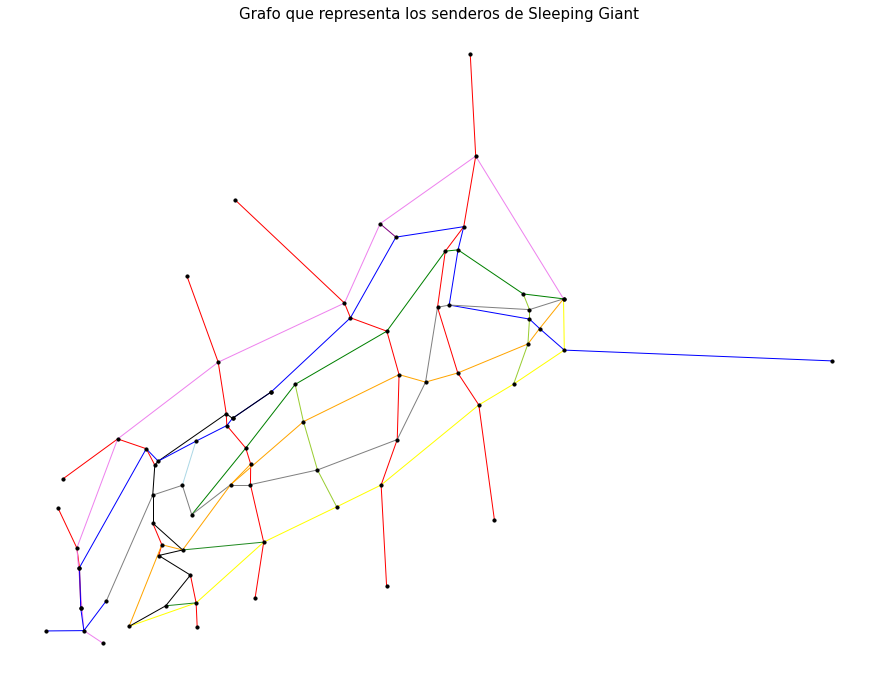

In [67]:
plt.figure(figsize=(12, 9))
nx.draw(g, pos=node_positions, edge_color=edge_colors, node_size=10, node_color='black')
plt.title('Grafo que representa los senderos de Sleeping Giant', size=15)
plt.xlabel('Posición X')
plt.ylabel('Posición Y')
plt.show()

Se puede visualizar el grafo de diferentes formas dependiendo de los parámetros que le pasemos al método `draw`.

Text(0, 0.5, 'Posición Y')

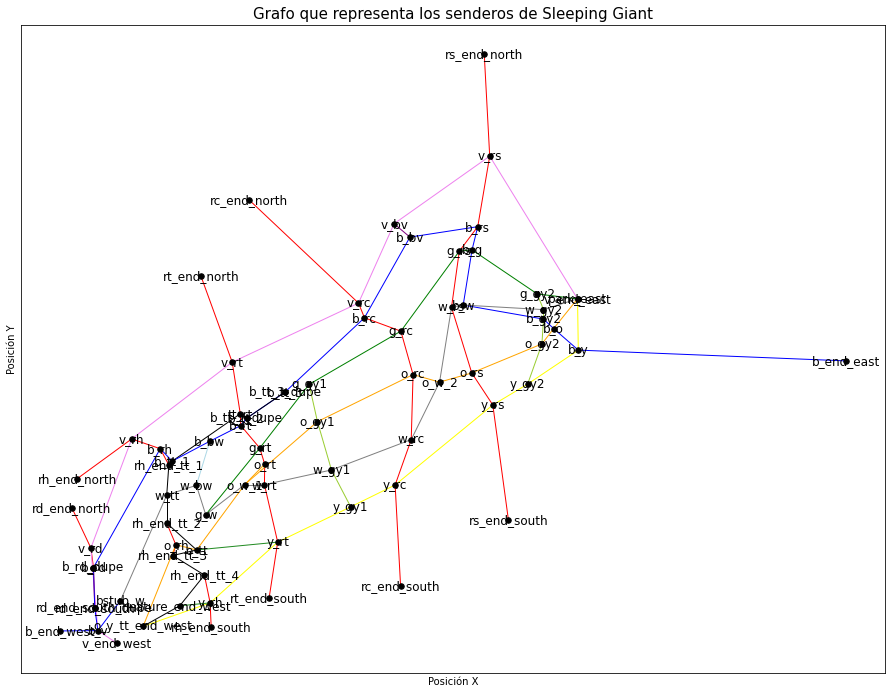

In [75]:
plt.figure(figsize=(12, 9))
nx.draw(g, pos=node_positions, edge_color=edge_colors, node_size=30, node_color='black', with_labels = True)
plt.title('Grafo que representa los senderos de Sleeping Giant', size=15)
plt.axis('on')
plt.xlabel('Posición X')
plt.ylabel('Posición Y')

# Tarea

Resolver los siguientes ejercicios para el próximo laboratorio:

* Dibujar el grafo con aristas grises y un alfa=0.4. Dibujar de color rojo todos los nodos que tengan un número de senderos de entrada o salida impar.
*  Dibujar el grafo con aristas grises y un alfa=0.4. Dibujar de color azul todos los nodos que tengan un número de senderos de entrada o salida par.
* Dibujar el grafo con aristas grises y un alfa=0.4. Dibujar de color rojo todos los nodos que tengan un número de senderos de entrada o salida impar y de color azul los que tengan nodos par.
* Encontrar el camino más corto entre rc_end_north y rs_end_south. Dibujar la ruta en el grafo. Donde los arcos rojos representen la ruta mínima y los grises las rutas que no son visitadas. Los arcos que son visitados colocar la distacia. (Optativo: Crear una animación del recorrido. Si es arregado al trabajo la nota del trabajo será el promedio entre un 7.0  y la nota final del laboratorio.)
* ¿Existen nodos que forman comunidades en el grafo?. Si es así, dibujar un grafo donde se muestren las comunidades. Arcos o rutas en rojo representan las comunidades conectadas y las grises nodos no conectados.

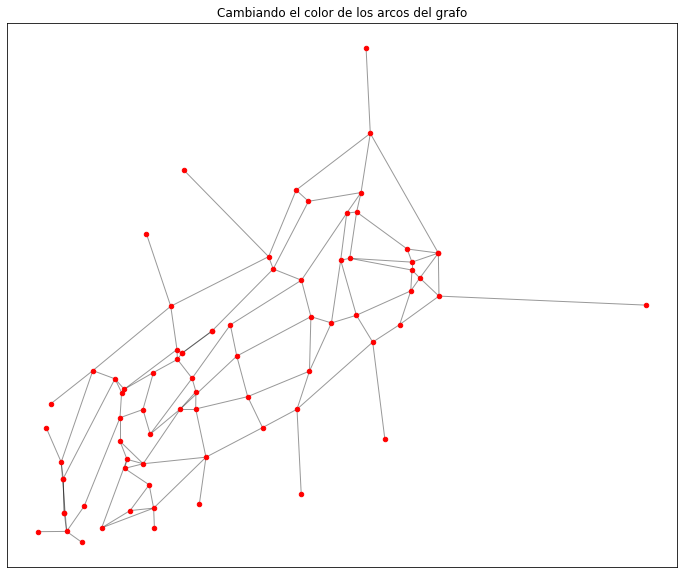

In [87]:
# Código de ejemplo
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(g, node_positions, node_size=20, node_color="red")
#nx.draw_networkx_nodes(g, node_new_colors, node_size=20, node_color="green")
nx.draw_networkx_edges(g, node_positions, alpha=0.4)
plt.axis('on')
#plt.grid('on')
plt.title('Cambiando el color de los arcos del grafo')
plt.show()